In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

In [17]:
data = pd.read_excel(r'C:\Users\frsim\Desktop\dataset allocazione ptf stocks\B\MHK US Equity.xlsx')
data.head()

,DATA,PX_LAST,PX_ASK,PX_BID,NET_INCOME_MARGIN_ADJUSTED,WACC_COST_DEBT,BS_ST_BORROW,BS_LT_BORROW,IS_RD_EXPEND,PX_TO_BOOK_RATIO,...,GEO_GROW_EBITDA,NET_INC_GROWTH,GEO_GROW_NET_INC,BEST_EPS_NXT_YR,MOV_AVG_50D,MOV_AVG_200D,RSI_14D,RSI_30D,RSI_9D,PX_VOLUME
0,2013-12-31,148.90,148.91,148.90,7.0948,3.3894,127.218,2132.79,0,2.4261,...,0.0,42.5703,0.0,0.0,138.8840,123.2779,65.1380,65.1935,67.9928,533632
1,2014-01-01,148.90,148.91,148.90,7.0948,3.3894,127.218,2132.79,0,2.4261,...,0.0,42.5703,0.0,0.0,138.8840,123.2779,65.1380,65.1935,67.9928,533632
2,2014-01-02,149.11,149.10,149.07,7.0948,3.3894,127.218,2132.79,0,2.4295,...,0.0,42.5703,0.0,0.0,139.3660,123.4603,65.4500,65.3393,68.4927,676997
3,2014-01-03,149.45,149.48,149.47,7.0948,3.3894,127.218,2132.79,0,2.4351,...,0.0,42.5703,0.0,0.0,139.8022,123.6346,65.9809,65.5808,69.3643,521291
4,2014-01-06,147.34,147.40,147.36,7.0948,3.3894,127.218,2132.79,0,2.4007,...,0.0,42.5703,0.0,0.0,140.1838,123.8148,59.8358,62.7730,58.1367,470527


In [18]:
#Montecarlo drift
number_simulation = 100
predict_day = 30

px_last = data['PX_LAST'].tolist()
returns = pd.DataFrame(px_last).pct_change()
last_price = px_last[-1]
results = pd.DataFrame()
avg_daily_ret = returns.mean()
variance = returns.var()
daily_vol = returns.std()
daily_drift = avg_daily_ret - (variance / 2)
drift = daily_drift - 0.5 * daily_vol ** 2

results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(data.PX_LAST.iloc[-1])
    for d in range(predict_day):
        shock = [drift + daily_vol * np.random.normal()]
        shock = np.mean(shock)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    results[i] = prices

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.86it/s]


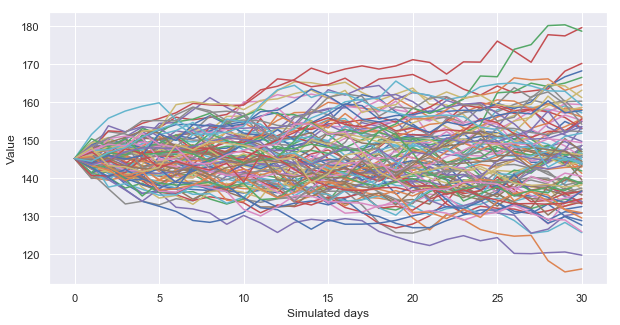

In [19]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

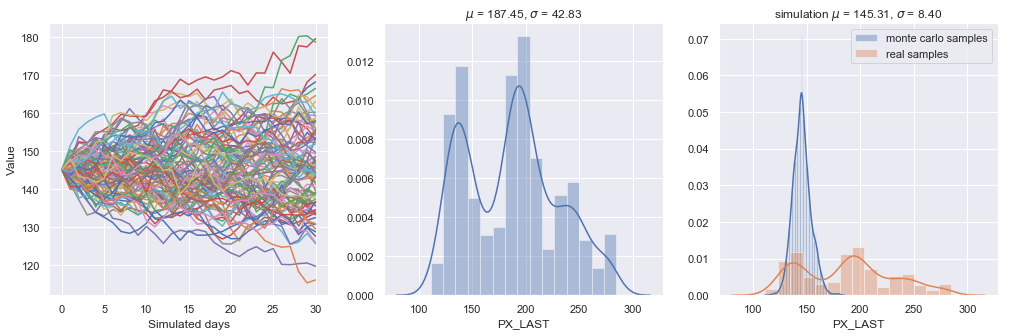

In [21]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(data.PX_LAST,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(data.PX_LAST.mean(),data.PX_LAST.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(data.PX_LAST,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()

In [22]:
#Montecarlo dynamic volatility
def pct_change(x,period=1):
    x = np.array(x)
    return ((x[period:] - x[:-period]) / x[:-period])

In [23]:
number_simulation = 100
predict_day = 30

results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = data.PX_LAST.values[-predict_day:].tolist()
    volatility = pct_change(prices[-predict_day:]).std()
    for d in range(predict_day):
        prices.append(prices[-1] * (1 + np.random.normal(0, volatility)))
        volatility = pct_change(prices[-predict_day:]).std()
    results[i] = pd.Series(prices[-predict_day:]).values

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 416.47it/s]


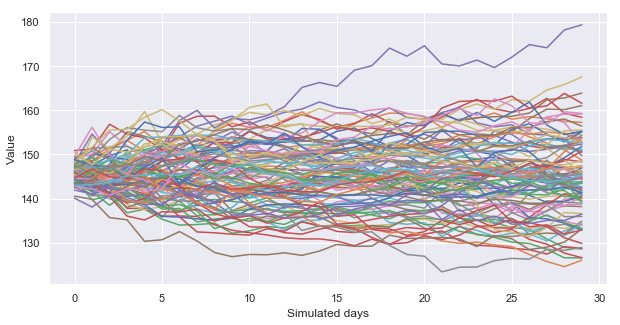

In [24]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

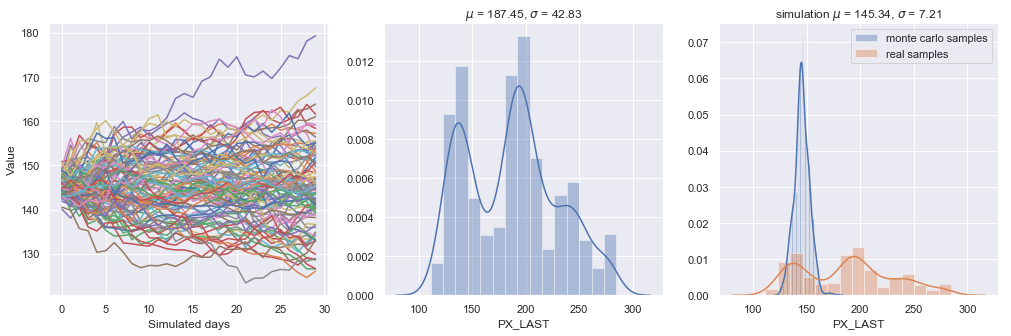

In [25]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(data.PX_LAST,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(data.PX_LAST.mean(),data.PX_LAST.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(data.PX_LAST,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()

In [27]:
#Montecarlo simple
def pct_change(x,period=1):
    x = np.array(x)
    return ((x[period:] - x[:-period]) / x[:-period])

In [28]:
number_simulation = 100
predict_day = 30
returns = data.PX_LAST.pct_change()
volatility = returns.std()
results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(data.PX_LAST.iloc[-1])
    for d in range(predict_day):
        prices.append(prices[d] * (1 + np.random.normal(0, volatility)))
    results[i] = pd.Series(prices).values

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1567.44it/s]


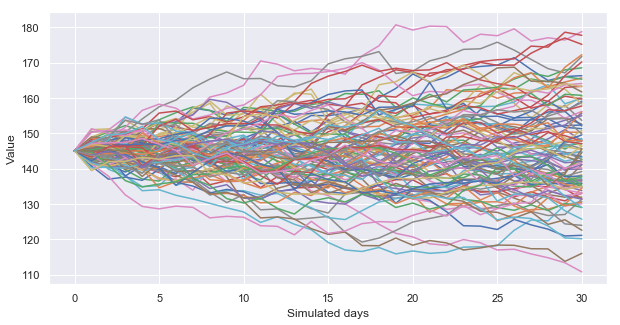

In [29]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

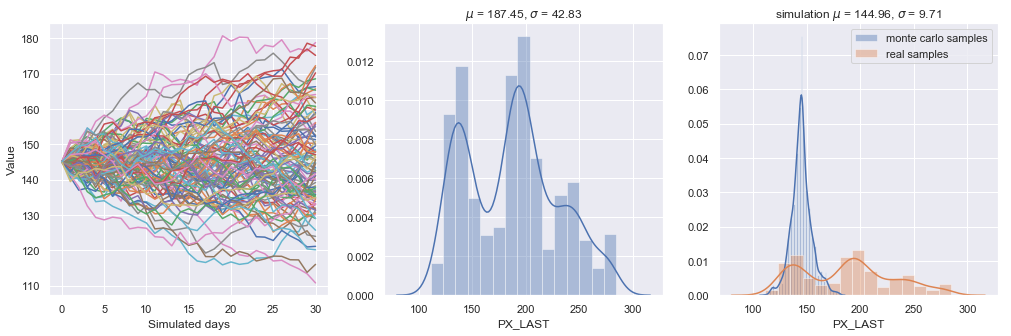

In [30]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(data.PX_LAST,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(data.PX_LAST.mean(),data.PX_LAST.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(data.PX_LAST,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()